In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.metrics import brier_score_loss
import matplotlib.pyplot as plt

In [2]:
predicted_dev = pd.read_pickle(r'file1')
predicted_val = pd.read_pickle(r'file2')
predicted_oot = pd.read_pickle(r'file3')

In [3]:
predicted_dev = predicted_dev[['CONTRACT_REF_NO','pred_prob_final']]
predicted_val = predicted_val[['CONTRACT_REF_NO','pred_prob_final']]
predicted_oot = predicted_oot[['CONTRACT_REF_NO','pred_prob_final']]

In [4]:
masterlist = pd.read_pickle(r'specify path to file')

In [5]:
masterlist = masterlist[['CONTRACT_REF_NO','tag','bad_flag']]

In [6]:
masterlist_dev = masterlist[masterlist['tag']=='DEV']
masterlist_val = masterlist[masterlist['tag']=='VAL']
masterlist_oot = masterlist[masterlist['tag']=='OOT']

In [7]:
predicted_non_pension_dev = predicted_dev.merge(masterlist_dev, how='left',on=['CONTRACT_REF_NO'])
predicted_non_pension_val = predicted_val.merge(masterlist_val, how='left',on=['CONTRACT_REF_NO'])
predicted_non_pension_oot = predicted_oot.merge(masterlist_oot, how='left',on=['CONTRACT_REF_NO'])

In [12]:
predicted_non_pension_dev['bad_flag'].mean()

0.1459653295182178

In [28]:
predicted_non_pension_dev = predicted_non_pension_dev.rename(columns = {'CONTRACT_REF_NO':'obs','pred_prob_final':'pd'})
predicted_non_pension_val = predicted_non_pension_val.rename(columns = {'CONTRACT_REF_NO':'obs','pred_prob_final':'pd'})
predicted_non_pension_oot = predicted_non_pension_oot.rename(columns = {'CONTRACT_REF_NO':'obs','pred_prob_final':'pd'})

In [72]:
print("Bad rate | DEV: ", np.round(predicted_non_pension_dev['bad_flag'].sum()/predicted_non_pension_dev['obs'].count()*100,2), "%")
print("Bad rate | VAL: ", np.round(predicted_non_pension_val['bad_flag'].sum()/predicted_non_pension_val['obs'].count()*100,2), "%")
print("Bad rate | OOT: ", np.round(predicted_non_pension_oot['bad_flag'].sum()/predicted_non_pension_oot['obs'].count()*100,2), "%")

Bad rate | DEV:  14.6 %
Bad rate | VAL:  14.9 %
Bad rate | OOT:  17.39 %


<div style="background-color: pink">
<h1 style="color: purple">Testing</h1>
</div>

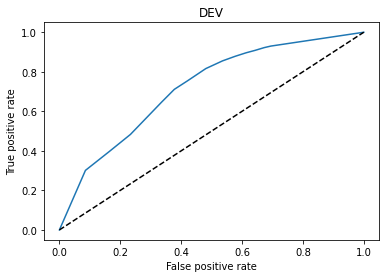

In [42]:
fpr, tpr, thresholds = metrics.roc_curve(predicted_non_pension_dev['bad_flag'], predicted_non_pension_dev['pd'])
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('DEV');

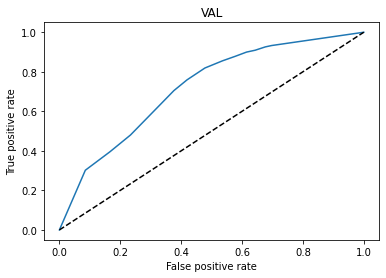

In [43]:
fpr1, tpr1, thresholds1 = metrics.roc_curve(predicted_non_pension_val['bad_flag'], predicted_non_pension_val['pd'])
plt.plot(fpr1, tpr1)
plt.plot(fpr1, fpr1, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('VAL');

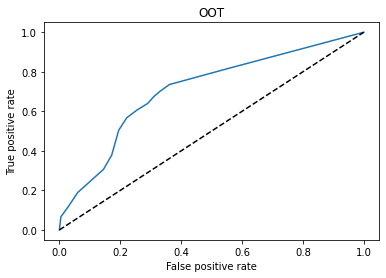

In [44]:
fpr2, tpr2, thresholds2 = metrics.roc_curve(predicted_non_pension_oot['bad_flag'], predicted_non_pension_oot['pd'])
plt.plot(fpr2, tpr2)
plt.plot(fpr2, fpr2, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('OOT');

In [59]:
# Calculate Youden's J-Statistic to identify the best threshhold
J = tpr - fpr
# locate the index of the largest J
ix = np.argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold | DEV: %f' % (np.round(best_thresh,2)))

Best Threshold | DEV: 0.140000


In [61]:
# Calculate Youden's J-Statistic to identify the best threshhold
J1 = tpr1 - fpr1
# locate the index of the largest J
ix = np.argmax(J1)
best_thresh1 = thresholds1[ix]
print('Best Threshold | VAL: %f' % (np.round(best_thresh1,2)))

Best Threshold | VAL: 0.140000


In [62]:
# Calculate Youden's J-Statistic to identify the best threshhold
J2 = tpr2 - fpr2
# locate the index of the largest J
ix = np.argmax(J2)
best_thresh2 = thresholds2[ix]
print('Best Threshold | OOT: %f' % (np.round(best_thresh2,2)))

Best Threshold | OOT: 0.060000


In [50]:
predicted_non_pension_dev['test'] = np.where(predicted_non_pension_dev['pd'] > best_thresh, 1, 0)
predicted_non_pension_val['test'] = np.where(predicted_non_pension_val['pd'] > best_thresh1, 1, 0)
predicted_non_pension_oot['test'] = np.where(predicted_non_pension_oot['pd'] > best_thresh2, 1, 0)

In [51]:
th1 = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
th2 = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2]
test_df = pd.DataFrame()

def test(th, df_merged):
    list = []
    for t in th:
        df = df_merged.copy()
        df['test'] = np.where(df['pd'] > t, 1, 0)
        df.head()
        confusion_matrix = metrics.confusion_matrix(df['bad_flag'],df['test'])
        Accuracy = metrics.accuracy_score(df['bad_flag'], df['test'])
        Sensitivity_recall = metrics.recall_score(df['bad_flag'], df['test'])
        F1_score = metrics.f1_score(df['bad_flag'], df['test'])
        Specificity = metrics.recall_score(df['bad_flag'], df['test'], pos_label=0)
        auc_test = metrics.roc_auc_score(df['bad_flag'], df['pd'])
        list.append([t, Accuracy, Sensitivity_recall, Specificity, F1_score, auc_test])
    df = pd.DataFrame (list, columns = ['Threshold', 'Accuracy', 'Sensitivity_recall', 'Specificity', 'F1_score', 'AUC'])
    test_df = df.copy()
    print(df)

In [52]:
test(th2, predicted_non_pension_dev)

    Threshold  Accuracy  Sensitivity_recall  Specificity  F1_score       AUC
0        0.01  0.145965            1.000000     0.000000  0.254747  0.718618
1        0.02  0.145965            1.000000     0.000000  0.254747  0.718618
2        0.03  0.145965            1.000000     0.000000  0.254747  0.718618
3        0.04  0.396537            0.929990     0.305363  0.310293  0.718618
4        0.05  0.413983            0.922225     0.327118  0.314795  0.718618
5        0.06  0.437952            0.908096     0.357598  0.320500  0.718618
6        0.07  0.460675            0.896258     0.386229  0.326660  0.718618
7        0.08  0.460675            0.896258     0.386229  0.326660  0.718618
8        0.09  0.489103            0.878310     0.422582  0.334165  0.718618
9        0.10  0.521209            0.855143     0.464136  0.342711  0.718618
10       0.11  0.521209            0.855143     0.464136  0.342711  0.718618
11       0.12  0.562383            0.816191     0.519004  0.352530  0.718618

In [76]:
np.round((2*0.718618-1)*100,0)

44.0

In [79]:
predicted_non_pension_dev.head()

,obs,pd,tag,bad_flag,test
0,126RGTK7002134AA_2019-09-30,0.033758,DEV,0,0
1,121RGTK0369420AA_2021-03-31,0.033758,DEV,0,0
2,RGTK2093350A139_2020-09-30,0.214232,DEV,0,1
3,RGTK2498623A144_2020-09-30,0.058419,DEV,0,0
4,110RGTK180190001_2019-03-29,0.099247,DEV,0,0


In [81]:
from sklearn.metrics import brier_score_loss
y_true = np.array([0, 1, 1, 0])
y_true_categorical = np.array(["spam", "ham", "ham", "spam"])
y_prob = np.array([0.1, 0.9, 0.8, 0.3])
brier_score_loss(predicted_non_pension_dev['bad_flag'], predicted_non_pension_dev['pd'])
brier_score_loss(predicted_non_pension_oot['bad_flag'], predicted_non_pension_oot['pd'])

0.13890149078276215

In [53]:
test(th2, predicted_non_pension_val)

    Threshold  Accuracy  Sensitivity_recall  Specificity  F1_score       AUC
0        0.01  0.149044            1.000000     0.000000  0.259423  0.718789
1        0.02  0.149044            1.000000     0.000000  0.259423  0.718789
2        0.03  0.149044            1.000000     0.000000  0.259423  0.718789
3        0.04  0.396541            0.932810     0.302613  0.315432  0.718789
4        0.05  0.413318            0.925829     0.323552  0.319916  0.718789
5        0.06  0.439286            0.908959     0.357023  0.325792  0.718789
6        0.07  0.461829            0.899651     0.385144  0.332581  0.718789
7        0.08  0.461829            0.899651     0.385144  0.332581  0.718789
8        0.09  0.490051            0.878418     0.422029  0.339269  0.718789
9        0.10  0.522478            0.855439     0.464160  0.348109  0.718789
10       0.11  0.522478            0.855439     0.464160  0.348109  0.718789
11       0.12  0.566263            0.819081     0.521983  0.360171  0.718789

In [54]:
test(th2, predicted_non_pension_oot)

    Threshold  Accuracy  Sensitivity_recall  Specificity  F1_score       AUC
0        0.01  0.173883            1.000000     0.000000  0.296253  0.707292
1        0.02  0.173883            1.000000     0.000000  0.296253  0.707292
2        0.03  0.173883            1.000000     0.000000  0.296253  0.707292
3        0.04  0.513871            0.814612     0.450570  0.368190  0.707292
4        0.05  0.655475            0.735338     0.638665  0.426031  0.707292
5        0.06  0.674315            0.702535     0.668375  0.428626  0.707292
6        0.07  0.686976            0.674950     0.689507  0.428526  0.707292
7        0.08  0.686976            0.674950     0.689507  0.428526  0.707292
8        0.09  0.697649            0.640159     0.709750  0.424068  0.707292
9        0.10  0.720724            0.606859     0.744691  0.430422  0.707292
10       0.11  0.720724            0.606859     0.744691  0.430422  0.707292
11       0.12  0.742027            0.567346     0.778795  0.433371  0.707292

In [77]:
np.round((2*0.707292-1)*100,0)

41.0

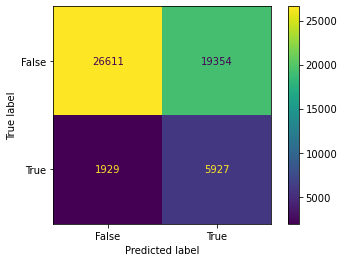

In [55]:
confusion_matrix = metrics.confusion_matrix(predicted_non_pension_dev['bad_flag'],predicted_non_pension_dev['test'])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

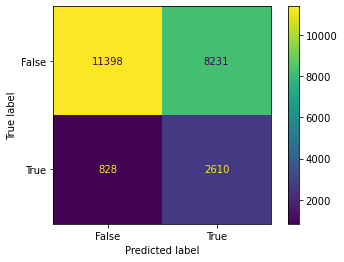

In [57]:
confusion_matrix = metrics.confusion_matrix(predicted_non_pension_val['bad_flag'],predicted_non_pension_val['test'])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

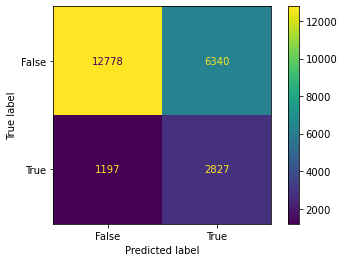

In [58]:
confusion_matrix = metrics.confusion_matrix(predicted_non_pension_oot['bad_flag'],predicted_non_pension_oot['test'])
cm_display_2 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display_2.plot()
plt.show()